Things to do with SHAP 
- Apply Lemmatization 
- Remove words such as "also" in addition to stop words
- Successfully apply SHAP and build an argument. Improve working on SHAP 
- Compare the SHAP value with the set of tweets for which there is complete agreement
- Apply spearmen rank correlation to check which set of tweets is more aligned with “Sad” subset
- Key Findings: SHAP is an interesting tool for studying inter-annotator disagreement 
- Use SHAP force plot



In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')  # For pos_tag
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/msawant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/msawant/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/msawant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/msawant/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/msawant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score, precision_score, recall_score

In [4]:
import pandas as pd
#file_path = "EXIST_2023/disagreement_records_task1.xlsx"

file_path_f="EXIST_2023/female_agreement_records.xlsx"
file_path_m="EXIST_2023/male_agreement_records.xlsx"
file_path_a="EXIST_2023/Complete_agreement_records.xlsx"

#file_path = "EXIST_2023/EXIST2023_Task1_en.xlsx"

data_f = pd.read_excel(file_path_f)
data_m = pd.read_excel(file_path_m)
data_a = pd.read_excel(file_path_a)

In [5]:

print(len(data_f))
print(len(data_m))


1818
1687


In [6]:
import re

def remove_urls_and_lower(text):
    # Define the regex pattern for URLs starting with http or https
    url_pattern = re.compile(r'http[s]?://\S+')
    # Substitute the URLs with an empty string
    cleaned_text = url_pattern.sub('', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text.strip()

In [7]:
def clean_text(text):
    return re.sub(r'[^A-Za-z\s]', '', text) if isinstance(text, str) else text
    #return re.sub(r'[^A-Za-z0-9\s]', '', text) if isinstance(text, str) else text

In [8]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
#additional_stopwords={'ago','also','along','always','amp','like','look','know','even','want','say','get','far','use','take','never','great','whole','know','even','use','take','would'}
stop_words.update(['ago','also','along','always','amp','like','look','know','even','want','say','get','far','use','take','never','great','whole','would','ok','dont','cant','shes','theyre','without','youre','isnt','us','yet','yall','u','id','man'])


#stop_words.update(['ago','also','along','always','amp','like','look','know','even','want','say','get','far','use','take','never','great','whole','would','ok','dont','cant','shes','theyre','without','youre'])

def stopwords_removal(text):
    words=word_tokenize(text)
    filtered_words=[w for w in words if w.lower() not in stop_words]
    return ' '.join(filtered_words)

In [9]:
from nltk.corpus import wordnet
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [10]:
from nltk.stem import WordNetLemmatizer
def apply_lemmatization(text):
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))  
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
        # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence

Complete agreement subset 

In [11]:
tweet_processed_a=data_a["tweet"].apply(remove_urls_and_lower)
tweet_processed_a=tweet_processed_a.apply(clean_text)
tweet_processed_a=tweet_processed_a.apply(apply_lemmatization)
tweet_processed_a=tweet_processed_a.apply(stopwords_removal)

In [12]:
vec_a=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1,1))
tweet_vectorized_a=vec_a.fit_transform(tweet_processed_a)

In [13]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(tweet_vectorized_a,data_a["majority_vote"], test_size=0.30, random_state=0)
#X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(tweet_vectorized,data["female_vote"], test_size=0.30, random_state=0)
#X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(tweet_vectorized,data["male_vote"], test_size=0.30, random_state=0)

In [14]:
rf_model_a=RandomForestClassifier(bootstrap=False, min_samples_leaf=4,min_samples_split=10,n_estimators=100,n_jobs=-1,random_state=10)
rf_model_a.fit(X_train_a, y_train_a)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=10, n_jobs=-1, random_state=10)

In [15]:
y_pred_rf_a =rf_model_a.predict(X_test_a)
y_pred_rf_a = y_pred_rf_a.astype(int)
accuracy= accuracy_score(y_test_a,y_pred_rf_a)
print("Complete agreement subset")
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test_a, y_pred_rf_a))
f1=f1_score(y_test_a,y_pred_rf_a,average='macro')
print(f"F1 score:{f1}")

# Calculate Precision and Recall
precision = precision_score(y_test_a, y_pred_rf_a, average='macro')
recall = recall_score(y_test_a, y_pred_rf_a, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Complete agreement subset
ACCURACY OF THE MODEL: 0.8134556574923547
F1 score:0.7443642748208998
Precision: 0.8506404076573475
Recall: 0.7195584684373922


Female subset of agreement

In [16]:
tweet_processed_f=data_f["tweet"].apply(remove_urls_and_lower)
tweet_processed_f=tweet_processed_f.apply(clean_text)
tweet_processed_f=tweet_processed_f.apply(apply_lemmatization)
tweet_processed_f=tweet_processed_f.apply(stopwords_removal)

In [17]:
vec_f=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1,1))
tweet_vectorized_f=vec_f.fit_transform(tweet_processed_f)

In [18]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(tweet_vectorized_f,data_f["majority_vote"], test_size=0.30, random_state=0)

In [19]:
rf_model_f=RandomForestClassifier(bootstrap=False, min_samples_leaf=4,min_samples_split=10,n_estimators=100,n_jobs=-1,random_state=10)
rf_model_f.fit(X_train_f, y_train_f)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=10, n_jobs=-1, random_state=10)

In [20]:
y_pred_rf_f =rf_model_f.predict(X_test_f)
y_pred_rf_f = y_pred_rf_f.astype(int)
accuracy= accuracy_score(y_test_f,y_pred_rf_f)
print("Female agreement subset")
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test_f, y_pred_rf_f))
f1=f1_score(y_test_f,y_pred_rf_f,average='macro')
print(f"F1 score:{f1}")

# Calculate Precision and Recall
precision = precision_score(y_test_f, y_pred_rf_f, average='macro')
recall = recall_score(y_test_f, y_pred_rf_f, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Female agreement subset
ACCURACY OF THE MODEL: 0.782051282051282
F1 score:0.7537847065644527
Precision: 0.7627972465581978
Recall: 0.7477398421945284


In [21]:
target_names = ['Yes','No']
print(classification_report(y_test_f, y_pred_rf_f, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.81      0.86      0.84       355
          No       0.71      0.63      0.67       191

    accuracy                           0.78       546
   macro avg       0.76      0.75      0.75       546
weighted avg       0.78      0.78      0.78       546



Male subset of agreement

In [22]:
tweet_processed_m=data_m["tweet"].apply(remove_urls_and_lower)
tweet_processed_m=tweet_processed_m.apply(clean_text)
tweet_processed_m=tweet_processed_m.apply(apply_lemmatization)
tweet_processed_m=tweet_processed_m.apply(stopwords_removal)

In [23]:
vec_m=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1,1))
tweet_vectorized_m=vec_m.fit_transform(tweet_processed_m)

In [24]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(tweet_vectorized_m,data_m["majority_vote"], test_size=0.30, random_state=0)

In [25]:
rf_model_m=RandomForestClassifier(bootstrap=False, min_samples_leaf=4,min_samples_split=10,n_estimators=100,n_jobs=-1,random_state=10)
rf_model_m.fit(X_train_m, y_train_m)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=10, n_jobs=-1, random_state=10)

In [26]:
y_pred_rf_m =rf_model_m.predict(X_test_m)
y_pred_rf_m = y_pred_rf_m.astype(int)
accuracy= accuracy_score(y_test_m,y_pred_rf_m)
print("Male agreement subset")
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test_m, y_pred_rf_m))
f1=f1_score(y_test_m,y_pred_rf_m,average='macro')
print(f"F1 score:{f1}")

# Calculate Precision and Recall
precision = precision_score(y_test_m, y_pred_rf_m, average='macro')
recall = recall_score(y_test_m, y_pred_rf_m, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Male agreement subset
ACCURACY OF THE MODEL: 0.8362919132149902
F1 score:0.8108319510188668
Precision: 0.8224105216161917
Recall: 0.8025222551928783


In [27]:
target_names = ['Yes','No']
print(classification_report(y_test_m, y_pred_rf_m, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.86      0.91      0.88       337
          No       0.79      0.70      0.74       170

    accuracy                           0.84       507
   macro avg       0.82      0.80      0.81       507
weighted avg       0.83      0.84      0.83       507



SHAP

In [28]:
%pip install shap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import tqdm

In [30]:
import shap

/Users/msawant/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
import matplotlib.pyplot as plt

Shap for female disagreement subset 

In [33]:
features_f=vec_f.get_feature_names_out()
#feature_importances_f = rf_model_f.feature_importances_
importances_f = pd.DataFrame(index=features_f)
#importances_f['importance'] = feature_importances_f
#importances_f['rank'] = importances_f['importance'].rank(ascending=False).values
#importances_f.sort_values('rank').head(10)

In [34]:
explainer_f = shap.TreeExplainer(rf_model_f, X_train_f.toarray())

In [35]:
# Get Shap values (extended version has other data returned as well as shap values)
shapley_values_train_extended = explainer_f(X_train_f.toarray(), check_additivity=False)
shapley_values_train_f = shapley_values_train_extended.values[:,:,1]
shapley_values_test_extended = explainer_f(X_test_f.toarray(), check_additivity=False)
shapley_values_test_f = shapley_values_test_extended.values[:,:,1]

# Calculate mean Shapley value for each feature in trainign set
importances_f['mean_shapley_values'] = np.mean(shapley_values_train_f, axis=0)

# Calculate mean absolute Shapley value for each feature in trainign set
# This will give us the average importance of each feature
importances_f['mean_abs_shapley_values'] = np.mean(np.abs(shapley_values_train_f),axis=0)

 96%|=================== | 1043/1092 [00:15<00:00]       

In [36]:
# Get top 10 features
#importance_top_f = importances_f.sort_values(by='importance', ascending=False).head(15).index
shapley_top_f = importances_f.sort_values(by='mean_abs_shapley_values', ascending=False).head(10).index

# Add to DataFrame
top_features_f = pd.DataFrame()
#top_features_f['importances'] = importance_top_f.values
top_features_f['Shapley'] = shapley_top_f.values

# Display
top_features_f

,Shapley
0,woman
1,men
2,cock
3,fuck
4,cook
5,hate
6,whore
7,people
8,feminist
9,bitch


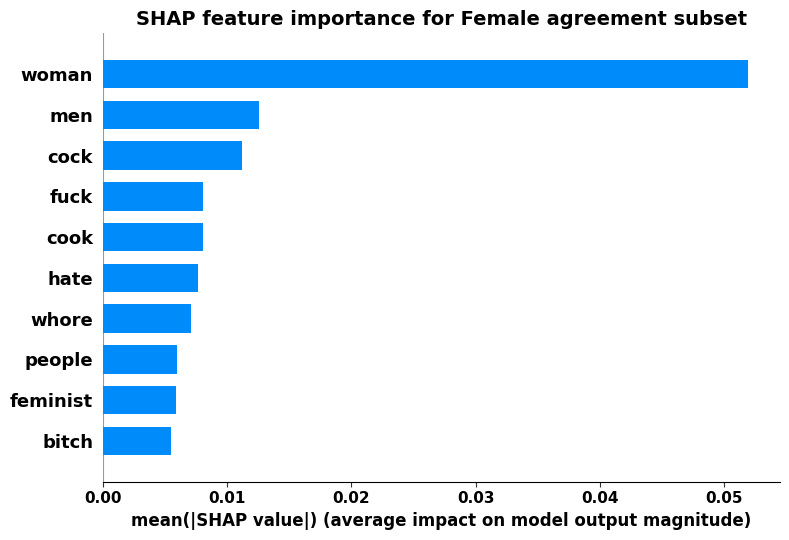

In [37]:
fig = plt.figure(figsize=(6,6))

shap.summary_plot(shap_values = shapley_values_train_f, 
                  features = X_train_f.toarray(),
                  feature_names = vec_f.get_feature_names_out(),
                  plot_type='bar',
                  max_display=10,
                  show=False)
plt.title("SHAP feature importance for Female agreement subset",fontsize=14, color='black', fontweight='bold')
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", fontsize=12, color='black', fontweight='bold')
plt.xticks(color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.tight_layout()
plt.show()

shap for male disagreement subset

In [38]:
features_m=vec_m.get_feature_names_out()
#feature_importances_m = rf_model_m.feature_importances_
importances_m = pd.DataFrame(index=features_m)
#importances_m['importance'] = feature_importances_m
#importances_m['rank'] = importances_m['importance'].rank(ascending=False).values
#importances_m.sort_values('rank').head(10)

In [39]:
explainer_m = shap.TreeExplainer(rf_model_m, X_train_m.toarray())

In [40]:
# Get Shap values (extended version has other data returned as well as shap values)
shapley_values_train_extended = explainer_m(X_train_m.toarray(), check_additivity=False)
shapley_values_train_m = shapley_values_train_extended.values[:,:,1]
shapley_values_test_extended = explainer_m(X_test_m.toarray(), check_additivity=False)
shapley_values_test_m = shapley_values_test_extended.values[:,:,1]

# Calculate mean Shapley value for each feature in trainign set
importances_m['mean_shapley_values'] = np.mean(shapley_values_train_m, axis=0)

# Calculate mean absolute Shapley value for each feature in trainign set
# This will give us the average importance of each feature
importances_m['mean_abs_shapley_values'] = np.mean(
    np.abs(shapley_values_train_m),axis=0)

 98%|===================| 990/1014 [00:14<00:00]         

In [41]:
# Get top 10 features
#importance_top_m = importances_m.sort_values(by='importance', ascending=False).head(15).index
shapley_top_m = importances_m.sort_values(by='mean_abs_shapley_values', ascending=False).head(10).index

# Add to DataFrame
top_m_features = pd.DataFrame()
#top_m_features['importances'] = importance_top_m.values
top_m_features['Shapley'] = shapley_top_m.values

# Display
top_m_features

,Shapley
0,woman
1,men
2,fuck
3,lady
4,bitch
5,blonde
6,sexist
7,dumb
8,hate
9,sexual


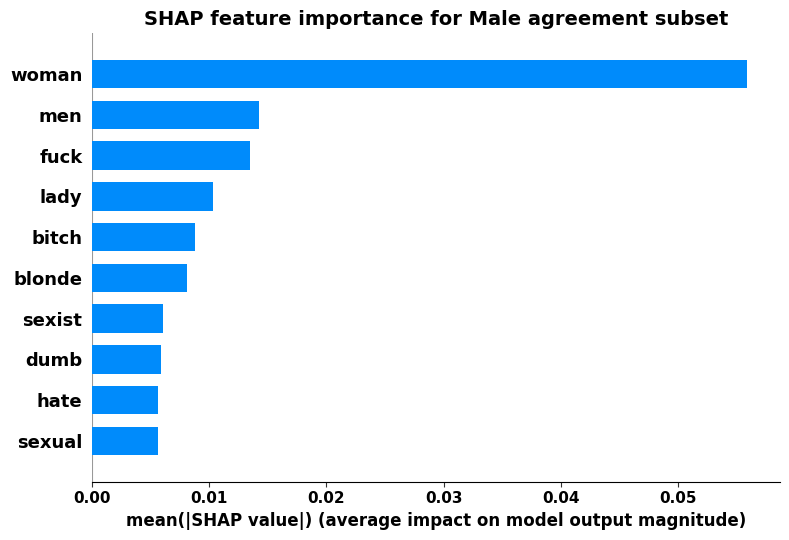

In [42]:
fig = plt.figure(figsize=(6,6))

shap.summary_plot(shap_values = shapley_values_train_m, 
                  features = X_train_m.toarray(),
                  feature_names = vec_m.get_feature_names_out(),
                  plot_type='bar',
                  max_display=10,
                  show=False)
plt.title("SHAP feature importance for Male agreement subset",fontsize=14, color='black', fontweight='bold')
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", fontsize=12, color='black', fontweight='bold')
plt.xticks(color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.tight_layout()
plt.show()

Spearman correlation

In [43]:
from scipy.stats import spearmanr

In [44]:
shap_mean_f=top_features_f['Shapley']
shap_mean_m=top_m_features['Shapley']
correlation_fm,p_value_fm=spearmanr(shap_mean_f,shap_mean_m)
# Print results
print("Spearman Rank Correlation between male annotators and female annotators")
print(f"Spearman Rank Correlation coefficient: {correlation_fm:.4f}")
print(f"p-value: {p_value_fm:.4f}")

Spearman Rank Correlation between male annotators and female annotators
Spearman Rank Correlation coefficient: 0.2970
p-value: 0.4047
